In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
import string
import re

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#load dataset
df = pd.read_csv('data_labeling.csv')
df

,tweet,label
0,Makanya pengen tau ranking mereka pasca Thomas...,P
1,Bravo India . #ThomasCup winners 2022.\n \n Th...,NT
2,"Benar, Lee Chong Wei sendiri pun ga pernah men...",P
3,Betul udh gk ada benernya dimata dia. Jadi kyk...,N
4,Iya benar. Zelin Resiana ex WD yg juara Uber C...,NT
...,...,...
442,âœ¨Indonesia menang Thomas Cup dan Sea Gamesâœ...,P
443,ðŸ† India has beaten Indonesia 3-0 to win its...,NT
444,"ðŸ’™ tuan-tuan dan nyonya-nyonya. Inilah dia, ...",P
445,"ðŸ’­ kalian yg nnton thomas cup, nnton nya dim...",NT


In [5]:
index = df['label']
index.value_counts()

NT    224
P     157
N      66
Name: label, dtype: int64

In [6]:
#=========================================================================#
def remove(tweet):
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/\S+', '', tweet)
    
    # remove hashtags
    tweet = re.sub(r'#[A-Za-z0-9_]+', '', tweet)

    # remove symbol
    tweet = re.sub(r'[^\x00-\x7f]', '', tweet)

    #remove coma
    tweet = re.sub(r',',' ',tweet)
    return tweet
df['remove_http'] = df['tweet'].apply(lambda x: remove(x))

In [7]:
df

,tweet,label,remove_http
0,Makanya pengen tau ranking mereka pasca Thomas...,P,Makanya pengen tau ranking mereka pasca Thomas...
1,Bravo India . #ThomasCup winners 2022.\n \n Th...,NT,Bravo India . winners .\n \n Thomas Cup champ...
2,"Benar, Lee Chong Wei sendiri pun ga pernah men...",P,Benar Lee Chong Wei sendiri pun ga pernah men...
3,Betul udh gk ada benernya dimata dia. Jadi kyk...,N,Betul udh gk ada benernya dimata dia. Jadi kyk...
4,Iya benar. Zelin Resiana ex WD yg juara Uber C...,NT,Iya benar. Zelin Resiana ex WD yg juara Uber C...
...,...,...,...
442,âœ¨Indonesia menang Thomas Cup dan Sea Gamesâœ...,P,Indonesia menang Thomas Cup dan Sea Games
443,ðŸ† India has beaten Indonesia 3-0 to win its...,NT,India has beaten Indonesia - to win its maide...
444,"ðŸ’™ tuan-tuan dan nyonya-nyonya. Inilah dia, ...",P,tuan-tuan dan nyonya-nyonya. Inilah dia Shes...
445,"ðŸ’­ kalian yg nnton thomas cup, nnton nya dim...",NT,kalian yg nnton thomas cup nnton nya dimana?


<function matplotlib.pyplot.show>

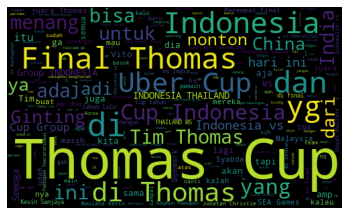

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = ' '.join([twts for twts in df['remove_http']])
wordCloud = WordCloud(width = 500, height = 300, random_state=0, max_font_size = 119).generate(allwords)
plt.imshow(wordCloud)
plt.axis('off')
plt.show

In [9]:
# oleh Tala, F.z (2003)
stopwords_buatan=['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya',
     'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila',
     'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya',
     'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya',
     'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah',
     'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah',
     'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah',
     'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya',
     'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan', 'berkenaan', 'berlainan', 'berlalu',
     'berlangsung', 'berlebihan', 'bermacam', 'bermacam-macam', 'bermaksud', 'bermula', 'bersama', 'bersama-sama',
     'bersiap', 'bersiap-siap', 'bertanya', 'bertanya-tanya', 'berturut', 'berturut-turut', 'bertutur', 'berujar', 'berupa',
     'besar', 'betul', 'betulkah', 'biasa', 'biasanya', 'bila', 'bilakah', 'bisa', 'bisakah', 'boleh', 'bolehkah',
     'bolehlah', 'buat', 'bukan', 'bukankah', 'bukanlah', 'bukannya', 'bulan', 'bung', 'cara', 'caranya', 'cukup',
     'cukupkah', 'cukuplah', 'cuma', 'dahulu', 'dalam', 'dan', 'dapat', 'dari', 'daripada', 'datang', 'dekat', 'demi',
     'demikian', 'demikianlah', 'dengan', 'dng', 'dg', 'depan', 'di', 'dia', 'diakhiri', 'diakhirinya', 'dialah', 'diantara',
     'diantaranya', 'diberi', 'diberikan', 'diberikannya', 'dibuat', 'dibuatnya', 'didapat', 'didatangkan', 'digunakan',
     'diibaratkan', 'diibaratkannya', 'diingat', 'diingatkan', 'diinginkan', 'dijawab', 'dijelaskan', 'dijelaskannya',
     'dikarenakan', 'dikatakan', 'dikatakannya', 'dikerjakan', 'diketahui', 'diketahuinya', 'dikira', 'dilakukan',
     'dilalui', 'dilihat', 'dimaksud', 'dimaksudkan', 'dimaksudkannya', 'dimaksudnya', 'diminta', 'dimintai', 'dimisalkan',
     'dimulai', 'dimulailah', 'dimulainya', 'dimungkinkan', 'dini', 'dipastikan', 'diperbuat', 'diperbuatnya',
     'dipergunakan', 'diperkirakan', 'diperlihatkan', 'diperlukan', 'diperlukannya', 'dipersoalkan', 'dipertanyakan',
     'dipunyai', 'diri', 'dirinya', 'disampaikan', 'disebut', 'disebutkan', 'disebutkannya', 'disini', 'disinilah',
     'ditambahkan', 'ditandaskan', 'ditanya', 'ditanyai', 'ditanyakan', 'ditegaskan', 'ditujukan', 'ditunjuk', 'ditunjuki',
     'ditunjukkan', 'ditunjukkannya', 'ditunjuknya', 'dituturkan', 'dituturkannya', 'diucapkan', 'diucapkannya',
     'diungkapkan', 'dong', 'dua', 'dulu', 'empat', 'enggak', 'enggaknya', 'entah', 'entahlah', 'guna', 'gunakan', 'hal',
     'hampir', 'hanya', 'hanyalah', 'hari', 'harus', 'haruslah', 'harusnya', 'hendak', 'hendaklah', 'hendaknya', 'hingga',
     'ia', 'ialah', 'ibarat', 'ibaratkan', 'ibaratnya', 'ibu', 'ikut', 'ingat', 'ingat-ingat', 'ingin', 'inginkah',
     'inginkan', 'ini', 'inikah', 'inilah', 'itu', 'itukah', 'itulah', 'jadi', 'jadilah', 'jadinya', 'jangan', 'jngn', 'jng', 'jgn', 'jangankan',
     'janganlah', 'jauh', 'jawab', 'jawaban', 'jawabnya', 'jelas', 'jelaskan', 'jelaslah', 'jelasnya', 'jika', 'jikalau',
     'juga', 'jumlah', 'jumlahnya', 'justru', 'kala', 'kalau', 'kalaulah', 'kalaupun', 'kalian', 'kami', 'kamilah', 'kamu',
     'kamulah', 'kan', 'kapan', 'kapankah', 'kapanpun', 'karena', 'krn', 'karenanya', 'kasus', 'kata', 'katakan', 'katakanlah',
     'katanya', 'ke', 'keadaan', 'kebetulan', 'kecil', 'kedua', 'keduanya', 'keinginan', 'kelamaan', 'kelihatan',
     'kelihatannya', 'kelima', 'keluar', 'kembali', 'kemudian', 'kemungkinan', 'kemungkinannya', 'kenapa', 'kepada',
     'kepadanya', 'kesampaian', 'keseluruhan', 'keseluruhannya', 'keterlaluan', 'ketika', 'khususnya', 'kini', 'kinilah',
     'kira', 'kira-kira', 'kiranya', 'kita', 'kitalah', 'kok', 'kurang', 'lagi', 'lagian', 'lah', 'lain', 'lainnya', 'lalu',
     'lama', 'lamanya', 'lanjut', 'lanjutnya', 'lebih', 'lewat', 'lima', 'luar', 'macam', 'maka', 'makanya', 'makin',
     'malah', 'malahan', 'mampu', 'mampukah', 'mana', 'manakala', 'manalagi', 'masa', 'masalah', 'masalahnya', 'masih',
     'masihkah', 'masing', 'masing-masing', 'mau', 'maupun', 'melainkan', 'melakukan', 'melalui', 'melihat', 'melihatnya',
     'memang', 'memastikan', 'memberi', 'memberikan', 'membuat', 'memerlukan', 'memihak', 'meminta', 'memintakan',
     'memisalkan', 'memperbuat', 'mempergunakan', 'memperkirakan', 'memperlihatkan', 'mempersiapkan', 'mempersoalkan',
     'mempertanyakan', 'mempunyai', 'memulai', 'memungkinkan', 'menaiki', 'menambahkan', 'menandaskan', 'menanti',
     'menanti-nanti', 'menantikan', 'menanya', 'menanyai', 'menanyakan', 'mendapat', 'mendapatkan', 'mendatang',
     'mendatangi', 'mendatangkan', 'menegaskan', 'mengakhiri', 'mengapa', 'mengatakan', 'mengatakannya', 'mengenai',
     'mengerjakan', 'mengetahui', 'menggunakan', 'menghendaki', 'mengibaratkan', 'mengibaratkannya', 'mengingat',
     'mengingatkan', 'menginginkan', 'mengira', 'mengucapkan', 'mengucapkannya', 'mengungkapkan', 'menjadi', 'menjawab',
     'menjelaskan', 'menuju', 'menunjuk', 'menunjuki', 'menunjukkan', 'menunjuknya', 'menurut', 'menuturkan',
     'menyampaikan', 'menyangkut', 'menyatakan', 'menyebutkan', 'menyeluruh', 'menyiapkan', 'merasa', 'mereka', 'merekalah',
     'merupakan', 'meski', 'meskipun', 'meyakini', 'meyakinkan', 'minta', 'mirip', 'misal', 'misalkan', 'misalnya', 'mula',
     'mulai', 'mulailah', 'mulanya', 'mungkin', 'mungkinkah', 'nah', 'naik', 'namun', 'nanti', 'nantinya', 'nyaris',
     'nyatanya', 'oleh', 'olehnya', 'pada', 'padahal', 'padanya', 'pak', 'paling', 'panjang', 'pantas', 'para', 'pasti',
     'pastilah', 'penting', 'pentingnya', 'per', 'percuma', 'perlu', 'perlukah', 'perlunya', 'pernah', 'persoalan',
     'pertama', 'pertama-tama', 'pertanyaan', 'pertanyakan', 'pihak', 'pihaknya', 'pukul', 'pula', 'pun', 'punya', 'rasa',
     'rasanya', 'rata', 'rupanya', 'saat', 'saatnya', 'saja', 'sajalah', 'saling', 'sama', 'sama-sama', 'sambil', 'sampai',
     'sampai-sampai', 'sampaikan', 'sana', 'sangat', 'sangatlah', 'satu', 'saya', 'sayalah', 'se', 'sebab', 'sebabnya',
     'sebagai', 'sbg', 'sebagaimana', 'sebagainya', 'sebagian', 'sebaik', 'sebaik-baiknya', 'sebaiknya', 'sebaliknya', 'sebanyak',
     'sebegini', 'sebegitu', 'sebelum', 'sebelumnya', 'sebenarnya', 'seberapa', 'sebesar', 'sebetulnya', 'sebisanya',
     'sebuah', 'sebut', 'sebutlah', 'sebutnya', 'secara', 'secukupnya', 'sedang', 'sedangkan', 'sedemikian', 'sedikit',
     'sedikitnya', 'seenaknya', 'segala', 'segalanya', 'segera', 'seharusnya', 'sehingga', 'seingat', 'sejak', 'sejauh',
     'sejenak', 'sejumlah', 'sekadar', 'sekadarnya', 'sekali', 'sekali-kali', 'sekalian', 'sekaligus', 'sekalipun',
     'sekarang', 'sekarang', 'sekecil', 'seketika', 'sekiranya', 'sekitar', 'sekitarnya', 'sekurang-kurangnya',
     'sekurangnya', 'sela', 'selain', 'selaku', 'selalu', 'selama', 'selama-lamanya', 'selamanya', 'selanjutnya', 'seluruh',
     'seluruhnya', 'semacam', 'semakin', 'semampu', 'semampunya', 'semasa', 'semasih', 'semata', 'semata-mata', 'semaunya',
     'sementara', 'semisal', 'semisalnya', 'sempat', 'semua', 'semuanya', 'semula', 'sendiri', 'sendirian', 'sendirinya',
     'seolah', 'seolah-olah', 'seorang', 'sepanjang', 'sepantasnya', 'sepantasnyalah', 'seperlunya', 'seperti',
     'sepertinya', 'sepihak', 'sering', 'seringnya', 'serta', 'serupa', 'sesaat', 'sesama', 'sesampai', 'sesegera',
     'sesekali', 'seseorang', 'sesuatu', 'sesuatunya', 'sesudah', 'sesudahnya', 'setelah', 'setempat', 'setengah',
     'seterusnya', 'setiap', 'setiba', 'setibanya', 'setidak-tidaknya', 'setidaknya', 'setinggi', 'seusai', 'sewaktu',
     'siap', 'siapa', 'siapakah', 'siapapun', 'sini', 'sinilah', 'soal', 'soalnya', 'suatu', 'sudah', 'sudahkah',
     'sudahlah', 'supaya', 'tadi', 'tadinya', 'tahu', 'tahun', 'tak', 'tambah', 'tambahnya', 'tampak', 'tampaknya',
     'tandas', 'tandasnya', 'tanpa', 'tanya', 'tanyakan', 'tanyanya', 'tapi', 'tegas', 'tegasnya', 'telah', 'tempat',
     'tengah', 'tentang', 'tentu', 'tentulah', 'tentunya', 'tepat', 'terakhir', 'terasa', 'terbanyak', 'terdahulu',
     'terdapat', 'terdiri', 'terhadap', 'terhadapnya', 'teringat', 'teringat-ingat', 'terjadi', 'terjadilah', 'terjadinya',
     'terkira', 'terlalu', 'terlebih', 'terlihat', 'termasuk', 'ternyata', 'tersampaikan', 'tersebut', 'tersebutlah',
     'tertentu', 'tertuju', 'terus', 'terutama', 'tetap', 'tetapi', 'tiap', 'tiba', 'tiba-tiba', 'tidak', 'tidakkah',
     'tidaklah', 'tiga', 'tinggi', 'toh', 'tunjuk', 'turut', 'tutur', 'tuturnya', 'ucap', 'ucapnya', 'ujar', 'ujarnya',
     'umum', 'umumnya', 'ungkap', 'ungkapnya', 'untuk', 'usah', 'usai', 'waduh', 'wah', 'wahai', 'waktu', 'waktunya',
     'walau', 'walaupun', 'wong', 'yaitu', 'yakin', 'yakni', 'yang', 'yg', 'aja', 'ni', 'nya', 'dah', 'sih','dari']

In [10]:
#=========================================================================#
#import stopword
from nltk.corpus import stopwords 
stopwords_indonesia = stopwords.words('indonesian')
 
#import sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import TweetTokenizer
 
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)
 
def clean_tweets(tweet):
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_indonesia and word not in stopwords_buatan and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
 
    return tweets_clean
df['tweet_clean'] = df['remove_http'].apply(lambda x: clean_tweets(x))
#=========================================================================#
df

,tweet,label,remove_http,tweet_clean
0,Makanya pengen tau ranking mereka pasca Thomas...,P,Makanya pengen tau ranking mereka pasca Thomas...,"[ken, tau, ranking, pasca, thomas, uber, cup, ..."
1,Bravo India . #ThomasCup winners 2022.\n \n Th...,NT,Bravo India . winners .\n \n Thomas Cup champ...,"[bravo, india, winners, thomas, cup, champions..."
2,"Benar, Lee Chong Wei sendiri pun ga pernah men...",P,Benar Lee Chong Wei sendiri pun ga pernah men...,"[lee, chong, wei, ga, juara, thomas, cup, koq,..."
3,Betul udh gk ada benernya dimata dia. Jadi kyk...,N,Betul udh gk ada benernya dimata dia. Jadi kyk...,"[udh, gk, benernya, mata, kyknya, udh, gak, pe..."
4,Iya benar. Zelin Resiana ex WD yg juara Uber C...,NT,Iya benar. Zelin Resiana ex WD yg juara Uber C...,"[iya, zelin, resiana, ex, wd, juara, uber, cup..."
...,...,...,...,...
442,âœ¨Indonesia menang Thomas Cup dan Sea Gamesâœ...,P,Indonesia menang Thomas Cup dan Sea Games,"[indonesia, menang, thomas, cup, sea, games]"
443,ðŸ† India has beaten Indonesia 3-0 to win its...,NT,India has beaten Indonesia - to win its maide...,"[india, has, beaten, indonesia, to, win, its, ..."
444,"ðŸ’™ tuan-tuan dan nyonya-nyonya. Inilah dia, ...",P,tuan-tuan dan nyonya-nyonya. Inilah dia Shes...,"[tuan, nyonya, shesar, hiren, rhustavito, jago..."
445,"ðŸ’­ kalian yg nnton thomas cup, nnton nya dim...",NT,kalian yg nnton thomas cup nnton nya dimana?,"[nnton, thomas, cup, nnton, mana]"


In [11]:
#remove punct
def remove_punct(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    return text
df['tweet_final'] = df['tweet_clean'].apply(lambda x: remove_punct(x))

In [12]:
df

,tweet,label,remove_http,tweet_clean,tweet_final
0,Makanya pengen tau ranking mereka pasca Thomas...,P,Makanya pengen tau ranking mereka pasca Thomas...,"[ken, tau, ranking, pasca, thomas, uber, cup, ...",ken tau ranking pasca thomas uber cup alangkah...
1,Bravo India . #ThomasCup winners 2022.\n \n Th...,NT,Bravo India . winners .\n \n Thomas Cup champ...,"[bravo, india, winners, thomas, cup, champions...",bravo india winners thomas cup champions indon...
2,"Benar, Lee Chong Wei sendiri pun ga pernah men...",P,Benar Lee Chong Wei sendiri pun ga pernah men...,"[lee, chong, wei, ga, juara, thomas, cup, koq,...",lee chong wei ga juara thomas cup koq sea game...
3,Betul udh gk ada benernya dimata dia. Jadi kyk...,N,Betul udh gk ada benernya dimata dia. Jadi kyk...,"[udh, gk, benernya, mata, kyknya, udh, gak, pe...",udh gk benernya mata kyknya udh gak peduli nga...
4,Iya benar. Zelin Resiana ex WD yg juara Uber C...,NT,Iya benar. Zelin Resiana ex WD yg juara Uber C...,"[iya, zelin, resiana, ex, wd, juara, uber, cup...",iya zelin resiana ex wd juara uber cup istri j...
...,...,...,...,...,...
442,âœ¨Indonesia menang Thomas Cup dan Sea Gamesâœ...,P,Indonesia menang Thomas Cup dan Sea Games,"[indonesia, menang, thomas, cup, sea, games]",indonesia menang thomas cup sea games
443,ðŸ† India has beaten Indonesia 3-0 to win its...,NT,India has beaten Indonesia - to win its maide...,"[india, has, beaten, indonesia, to, win, its, ...",india has beaten indonesia to win its maiden t...
444,"ðŸ’™ tuan-tuan dan nyonya-nyonya. Inilah dia, ...",P,tuan-tuan dan nyonya-nyonya. Inilah dia Shes...,"[tuan, nyonya, shesar, hiren, rhustavito, jago...",tuan nyonya shesar hiren rhustavito jago indon...
445,"ðŸ’­ kalian yg nnton thomas cup, nnton nya dim...",NT,kalian yg nnton thomas cup nnton nya dimana?,"[nnton, thomas, cup, nnton, mana]",nnton thomas cup nnton mana


In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
"""allwords = ' '.join([twts for twts in df['tweet_final']])
wordCloud = WordCloud(width = 500, height = 300, random_state=0, max_font_size = 119).generate(allwords)
plt.imshow(wordCloud)
plt.axis('off')
plt.show"""

"allwords = ' '.join([twts for twts in df['tweet_final']])\nwordCloud = WordCloud(width = 500, height = 300, random_state=0, max_font_size = 119).generate(allwords)\nplt.imshow(wordCloud)\nplt.axis('off')\nplt.show"

<function matplotlib.pyplot.show>

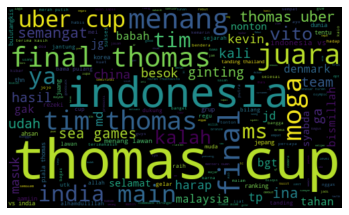

In [14]:
positif = df[df['label']=='P']
all_text_p = ' '.join(word for word in positif['tweet_final'])
wordcloud = WordCloud(width = 500, height = 300, random_state=0, max_font_size = 119).generate(all_text_p)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show>

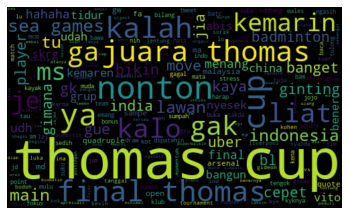

In [15]:
negatif = df[df['label']=='N']
all_text_n = ' '.join(word for word in negatif['tweet_final'])
wordcloud = WordCloud(width = 500, height = 300, random_state=0, max_font_size = 119).generate(all_text_n)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show>

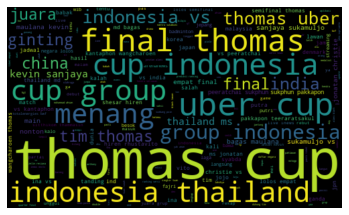

In [16]:
netral = df[df['label']=='NT']
all_text_nt = ' '.join(word for word in netral['tweet_final'])
wordcloud = WordCloud(width = 500, height = 300, random_state=0, max_font_size = 119).generate(all_text_nt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

In [17]:
new_df=pd.DataFrame(df['tweet_final'])

In [18]:
new_df['label']=df['label']

In [19]:
new_df

,tweet_final,label
0,ken tau ranking pasca thomas uber cup alangkah...,P
1,bravo india winners thomas cup champions indon...,NT
2,lee chong wei ga juara thomas cup koq sea game...,P
3,udh gk benernya mata kyknya udh gak peduli nga...,N
4,iya zelin resiana ex wd juara uber cup istri j...,NT
...,...,...
442,indonesia menang thomas cup sea games,P
443,india has beaten indonesia to win its maiden t...,NT
444,tuan nyonya shesar hiren rhustavito jago indon...,P
445,nnton thomas cup nnton mana,NT


In [20]:
new_df.to_csv('data_bersih_label.csv',encoding='utf-8', index=False)

In [21]:
df_fix = pd.read_csv('data_bersih_label.csv')
df_fix

,tweet_final,label
0,ken tau ranking pasca thomas uber cup alangkah...,P
1,bravo india winners thomas cup champions indon...,NT
2,lee chong wei ga juara thomas cup koq sea game...,P
3,udh gk benernya mata kyknya udh gak peduli nga...,N
4,iya zelin resiana ex wd juara uber cup istri j...,NT
...,...,...
442,indonesia menang thomas cup sea games,P
443,india has beaten indonesia to win its maiden t...,NT
444,tuan nyonya shesar hiren rhustavito jago indon...,P
445,nnton thomas cup nnton mana,NT


In [22]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_final  447 non-null    object
 1   label        447 non-null    object
dtypes: object(2)
memory usage: 7.1+ KB


In [23]:
x=df_fix['tweet_final']
y=df_fix['label']

In [24]:
y.value_counts()

NT    224
P     157
N      66
Name: label, dtype: int64

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3))
x=vectorizer.fit_transform(x)

In [27]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=4).fit_resample(x, y)

In [28]:
y_resampled.value_counts()

P     224
NT    224
N     224
Name: label, dtype: int64

In [29]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score, classification_report

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
skf = StratifiedKFold(n_splits=5)
fold = 0
for train_index, test_index in skf.split(X_resampled, y_resampled):
  fold += 1
  X_train, X_test = X_resampled[train_index], X_resampled[test_index]
  y_train, y_test = y_resampled[train_index], y_resampled[test_index]
  print("Fold ke : ", fold)
  for c in [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]:
    svm_test = LinearSVC(C=c)
    svm_test.fit(X_train, y_train)
    predict = svm_test.predict(X_test)
    print("Akurasi C = %s : %s" %(c, accuracy_score(y_test, predict)))
  print("\n")

Fold ke :  1
Akurasi C = 0.01 : 0.8074074074074075
Akurasi C = 0.05 : 0.8148148148148148
Akurasi C = 0.1 : 0.8296296296296296
Akurasi C = 0.25 : 0.8592592592592593
Akurasi C = 0.5 : 0.8666666666666667
Akurasi C = 0.75 : 0.8592592592592593
Akurasi C = 1 : 0.8592592592592593


Fold ke :  2
Akurasi C = 0.01 : 0.6962962962962963
Akurasi C = 0.05 : 0.6962962962962963
Akurasi C = 0.1 : 0.7037037037037037
Akurasi C = 0.25 : 0.7111111111111111
Akurasi C = 0.5 : 0.7333333333333333
Akurasi C = 0.75 : 0.7407407407407407
Akurasi C = 1 : 0.7481481481481481


Fold ke :  3
Akurasi C = 0.01 : 0.7835820895522388
Akurasi C = 0.05 : 0.8582089552238806
Akurasi C = 0.1 : 0.8582089552238806
Akurasi C = 0.25 : 0.8656716417910447
Akurasi C = 0.5 : 0.8731343283582089
Akurasi C = 0.75 : 0.8731343283582089
Akurasi C = 1 : 0.8731343283582089


Fold ke :  4
Akurasi C = 0.01 : 0.7761194029850746
Akurasi C = 0.05 : 0.8283582089552238
Akurasi C = 0.1 : 0.8134328358208955
Akurasi C = 0.25 : 0.8283582089552238
Akurasi 

In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
skf = StratifiedKFold(n_splits=5)
fold = 0
for train_index, test_index in skf.split(X_resampled, y_resampled):
  fold += 1
  X_train, X_test = X_resampled[train_index], X_resampled[test_index]
  y_train, y_test = y_resampled[train_index], y_resampled[test_index]
  print("Fold ke : ", fold)
  svm = LinearSVC(C=0.5)
  svm.fit(X_train, y_train)
  predict = svm.predict(X_test)
  print("Akurasi = %s" %(accuracy_score(y_test, predict)))
  print("Precision = %s" %(precision_score(y_test, predict, average = 'weighted')))
  print("Recall = %s" %(recall_score(y_test, predict, average = 'weighted')))
  print("F1 Score = %s" %(f1_score(y_test, predict, average = 'weighted')))
  print("\n")

Fold ke :  1
Akurasi = 0.8666666666666667
Precision = 0.8715686274509804
Recall = 0.8666666666666667
F1 Score = 0.8670880149812734


Fold ke :  2
Akurasi = 0.7333333333333333
Precision = 0.7326091825307951
Recall = 0.7333333333333333
F1 Score = 0.7307270271015411


Fold ke :  3
Akurasi = 0.8731343283582089
Precision = 0.8751565207988897
Recall = 0.8731343283582089
F1 Score = 0.8713234773200262


Fold ke :  4
Akurasi = 0.8134328358208955
Precision = 0.811808982688627
Recall = 0.8134328358208955
F1 Score = 0.8100504132443975


Fold ke :  5
Akurasi = 0.8134328358208955
Precision = 0.881029634436513
Recall = 0.8134328358208955
F1 Score = 0.798192495656503




#SELESAI